# <h1 style="color: teal">APPARENT TEMPERATURE PREDICTION USING WEATHER VARIABLES</h1>

# <h1><span style="color: teal">INDEX :</span></h1>

I. [INTRODUCTION](#1)

II. [DATA CLEANING](#2)

III. [ELABORATORY DATA ANALYSIS](#3)
- [Corelattion in Data](#31)
- [Data Visualization](#32)

IV. [PREDICTING APPARENT TEMPERATURE](#4)

v. [SUMMARY](#5)

# <h1><a id='1' style="color: teal">I. INTRODUCTION</a></h1>

## <Li style="list-style-type: square"><span style="color: teal">Question Statement</span></Li>
Is there a relationship between humidity and temperature? What about between humidity and apparent temperature? Can you predict the apparent temperature given the humidity?

Statistics and Machine Learning can help us answer these questions and predict various relations and variables given the data.
Apparent temperature is the temperature that it feels like to our body because of other weather variables other than temperature.This is generally higher incase of high humidity.

In this project i am trying to predict the apparent temperature given other weather variables in an hourly manner.

## <Li style="list-style-type: square"><span style="color: teal">Objective</span></li>
<li>Clean the data and drop useless columns.</li>
<li>Make a EDA report.</li>
<li>Visualize the distributions of various features and correlations between them.</li>
<li>Feature engineering to extract the correct features for the model.</li>
<li>Train a regression model to predict the apparent temperature.</li>


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('weather_data.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [3]:
data.describe(include='all')

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,5999,5999,5999,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.0,5999.000000,5999
unique,5999,14,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58
top,2006-04-21 03:00:00.000 +0200,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,1,1791,4762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600
mean,NaN,NaN,NaN,10.217695,8.958658,0.779488,10.007362,190.349558,9.476875,0.0,997.359828,NaN
std,NaN,NaN,NaN,10.565425,11.923712,0.173051,6.536619,107.026792,4.038583,0.0,145.173638,NaN
min,NaN,NaN,NaN,-14.088889,-22.094444,0.270000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,1.094444,-1.538889,0.680000,4.878300,122.000000,6.906900,0.0,1012.060000,NaN
50%,NaN,NaN,NaN,10.050000,10.050000,0.830000,9.064300,190.000000,9.982000,0.0,1016.840000,NaN
75%,NaN,NaN,NaN,18.722222,18.722222,0.920000,13.395200,287.000000,11.270000,0.0,1022.490000,NaN


In [4]:
data.shape

(5999, 12)

In [5]:
data.size

71988

# <h1><a id="2" style="color: teal">II. DATA CLEANING</a></h1>

## <Li style="list-style-type: square"><span style="color: teal">Statement:</span></Li>
<li>Perform data cleaning using pandas library. Which includes replacing the miscoded information and handling missing data.</li>

In [6]:
# information of data before cleaning.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 12 columns):
Formatted Date              5999 non-null object
Summary                     5999 non-null object
Precip Type                 5999 non-null object
Temperature (C)             5999 non-null float64
Apparent Temperature (C)    5999 non-null float64
Humidity                    5999 non-null float64
Wind Speed (km/h)           5999 non-null float64
Wind Bearing (degrees)      5999 non-null int64
Visibility (km)             5999 non-null float64
Loud Cover                  5999 non-null int64
Pressure (millibars)        5999 non-null float64
Daily Summary               5999 non-null object
dtypes: float64(6), int64(2), object(4)
memory usage: 562.5+ KB


In [7]:
# Dropping unnecessary columns
cols = ['Summary','Precip Type','Daily Summary','Wind Bearing (degrees)','Visibility (km)','Loud Cover']
data = data.drop(cols,axis=1)

In [8]:
#Removing Offet from Formatted Date
data['Formatted Date'] = data['Formatted Date'].map(lambda x: str(x)[:-6])

In [9]:
# Converting Formatted Date from Object to DateTimeObject.
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 6 columns):
Formatted Date              5999 non-null datetime64[ns]
Temperature (C)             5999 non-null float64
Apparent Temperature (C)    5999 non-null float64
Humidity                    5999 non-null float64
Wind Speed (km/h)           5999 non-null float64
Pressure (millibars)        5999 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 281.3 KB


In [10]:
# Indexing according to date and time.
idata = data.sort_values(by=['Formatted Date'])

In [11]:
# Setting Index
idata = idata.set_index('Formatted Date')
idata.index

DatetimeIndex(['2006-01-01 00:00:00', '2006-01-01 01:00:00',
               '2006-01-01 02:00:00', '2006-01-01 03:00:00',
               '2006-01-01 04:00:00', '2006-01-01 05:00:00',
               '2006-01-01 06:00:00', '2006-01-01 07:00:00',
               '2006-01-01 08:00:00', '2006-01-01 09:00:00',
               ...
               '2006-12-31 14:00:00', '2006-12-31 15:00:00',
               '2006-12-31 16:00:00', '2006-12-31 17:00:00',
               '2006-12-31 18:00:00', '2006-12-31 19:00:00',
               '2006-12-31 20:00:00', '2006-12-31 21:00:00',
               '2006-12-31 22:00:00', '2006-12-31 23:00:00'],
              dtype='datetime64[ns]', name='Formatted Date', length=5999, freq=None)

In [12]:
#removing duplicate values in the index
idata.index.drop_duplicates(keep='first')

DatetimeIndex(['2006-01-01 00:00:00', '2006-01-01 01:00:00',
               '2006-01-01 02:00:00', '2006-01-01 03:00:00',
               '2006-01-01 04:00:00', '2006-01-01 05:00:00',
               '2006-01-01 06:00:00', '2006-01-01 07:00:00',
               '2006-01-01 08:00:00', '2006-01-01 09:00:00',
               ...
               '2006-12-31 14:00:00', '2006-12-31 15:00:00',
               '2006-12-31 16:00:00', '2006-12-31 17:00:00',
               '2006-12-31 18:00:00', '2006-12-31 19:00:00',
               '2006-12-31 20:00:00', '2006-12-31 21:00:00',
               '2006-12-31 22:00:00', '2006-12-31 23:00:00'],
              dtype='datetime64[ns]', name='Formatted Date', length=5999, freq=None)

In [13]:
# data after cleaning
idata.dropna()
idata.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-01-01 00:00:00,0.577778,-4.050000,0.89,17.1143,1016.66
2006-01-01 01:00:00,1.161111,-3.238889,0.85,16.6152,1016.15
2006-01-01 02:00:00,1.666667,-3.155556,0.82,20.2538,1015.87
2006-01-01 03:00:00,1.711111,-2.194444,0.82,14.4900,1015.56
2006-01-01 04:00:00,1.183333,-2.744444,0.86,13.9426,1014.98


In [14]:
# information of data after after cleaning.
idata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5999 entries, 2006-01-01 00:00:00 to 2006-12-31 23:00:00
Data columns (total 5 columns):
Temperature (C)             5999 non-null float64
Apparent Temperature (C)    5999 non-null float64
Humidity                    5999 non-null float64
Wind Speed (km/h)           5999 non-null float64
Pressure (millibars)        5999 non-null float64
dtypes: float64(5)
memory usage: 441.2 KB


# <h1><a id="3" style="color:teal">III. EXPLORATORY DATA ANALYSIS</a></h1>

## <Li style="list-style-type: square"><span style="color: teal">Statement:</span></Li>
<li>Make a Exploratory Data Analysis on the data using pandas.</li>
<li>Visualize distributions and correlation of features using seaborn and pandas</li>

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-01-01 00:00:00,0.577778,-4.050000,0.89,17.1143,1016.66
2006-01-01 01:00:00,1.161111,-3.238889,0.85,16.6152,1016.15
2006-01-01 02:00:00,1.666667,-3.155556,0.82,20.2538,1015.87
2006-01-01 03:00:00,1.711111,-2.194444,0.82,14.4900,1015.56
2006-01-01 04:00:00,1.183333,-2.744444,0.86,13.9426,1014.98


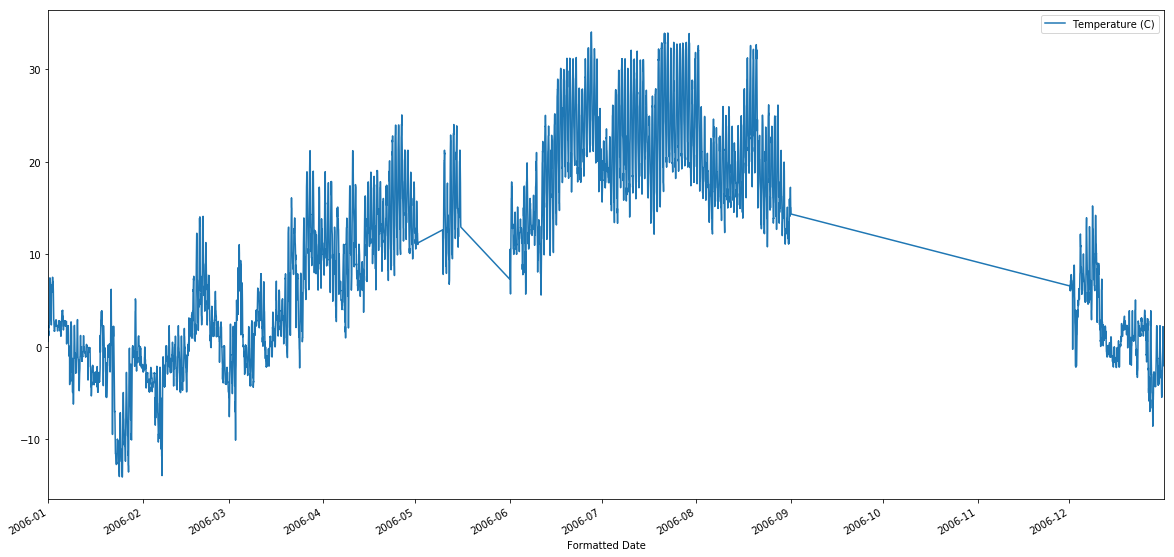

In [15]:
#plotting the data
idata.plot(y="Temperature (C)",figsize=(20,10))
idata.head()

## As you see, the graph is too congested. We Resample the data in days.

In [16]:
#resampling the data into day format
idata2 = idata.resample('D').mean()
idata2.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-01-01,3.873148,-0.447222,0.818333,21.372750,1012.279167
2006-01-02,5.418519,2.042593,0.844583,17.551683,1010.131667
2006-01-03,2.319444,0.223843,0.898333,8.417617,1020.805000
2006-01-04,2.274074,-0.457407,0.905417,11.579925,981.826667
2006-01-05,2.698148,0.256481,0.948333,9.515100,935.988333


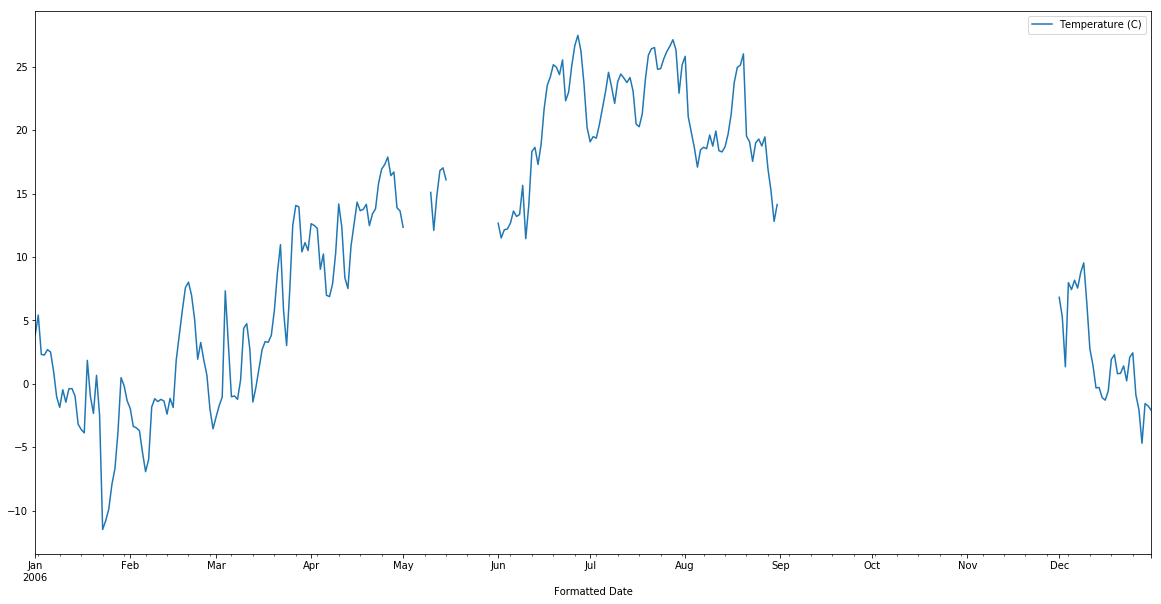

In [17]:
idata2.plot(y="Temperature (C)",figsize=(20,10))

## Now we see that data is not complete in the month of May, Sept, Oct and Nov.

## <h1 style="color:teal">Taking data of january month only.</h1>

In [18]:
#extracting data from the month of January
jan2006 = idata['2006-01-01':'2006-01-31']
jan2006.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-01-01 00:00:00,0.577778,-4.050000,0.89,17.1143,1016.66
2006-01-01 01:00:00,1.161111,-3.238889,0.85,16.6152,1016.15
2006-01-01 02:00:00,1.666667,-3.155556,0.82,20.2538,1015.87
2006-01-01 03:00:00,1.711111,-2.194444,0.82,14.4900,1015.56
2006-01-01 04:00:00,1.183333,-2.744444,0.86,13.9426,1014.98


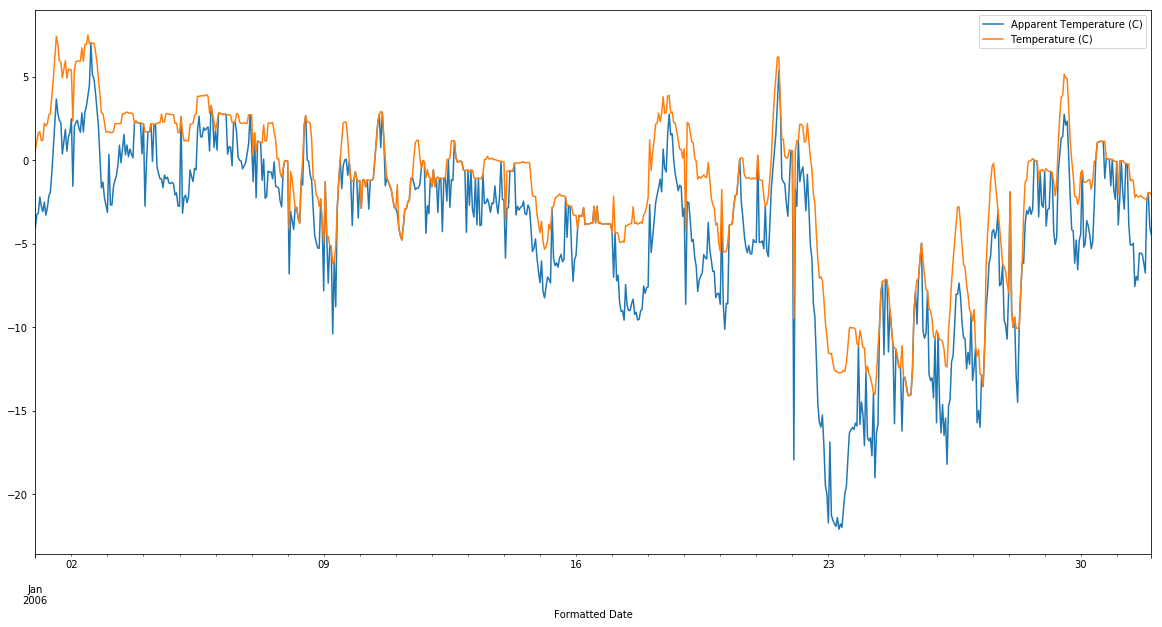

In [19]:
jan2006.plot(y=['Apparent Temperature (C)','Temperature (C)'],kind='line',figsize=(20,10))

## As you see, the graph is too congested. We Resample the data in days.

In [20]:
#resampling
JAN = jan2006.resample('D').mean()
JAN.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-01-01,3.873148,-0.447222,0.818333,21.372750,1012.279167
2006-01-02,5.418519,2.042593,0.844583,17.551683,1010.131667
2006-01-03,2.319444,0.223843,0.898333,8.417617,1020.805000
2006-01-04,2.274074,-0.457407,0.905417,11.579925,981.826667
2006-01-05,2.698148,0.256481,0.948333,9.515100,935.988333


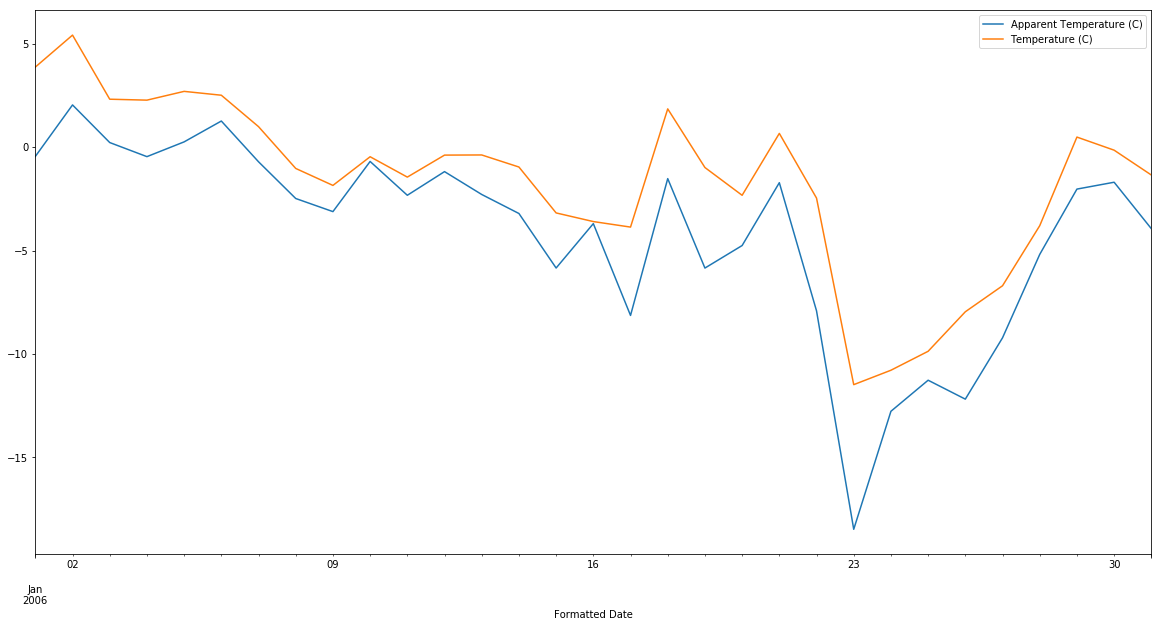

In [21]:
JAN.plot(y=['Apparent Temperature (C)','Temperature (C)'],kind='line',figsize=(20,10))

## Difference in Apparent Temperature and Temperature is easily visible.

## <h1 style="color: teal">Now Plotting as per Seasons.</h1>

In [22]:
winter1 = idata2['2006-01-01':'2006-02-28']
winter2 = idata2['2006-12-01':'2006-12-31']
winter3=[winter1,winter2]
winter=pd.concat(winter3)
spring = idata2['2006-03-01':'2006-05-31']
summer = idata2['2006-06-01':'2006-08-31']

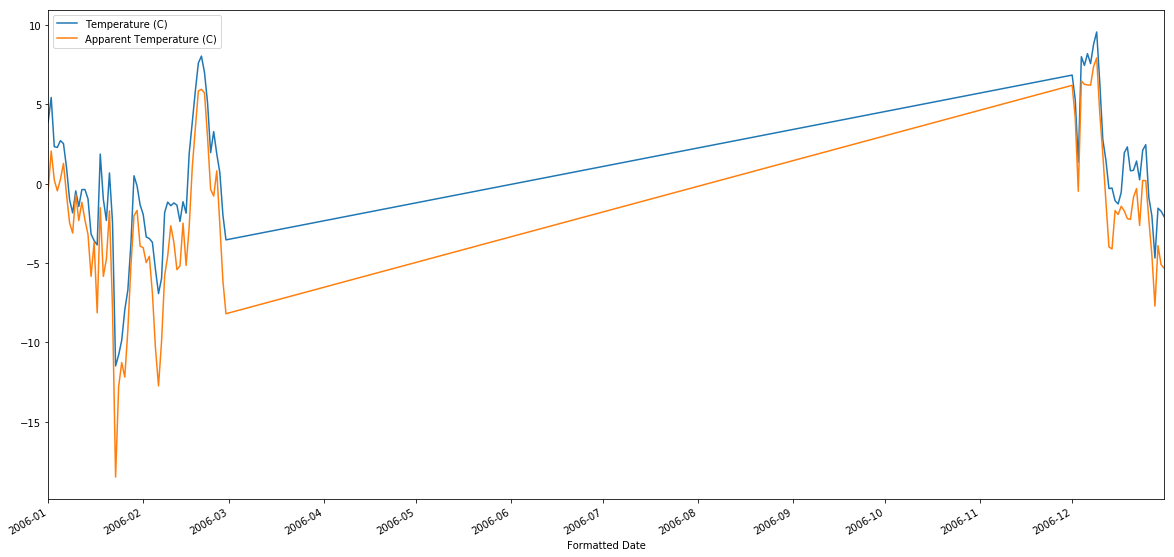

In [23]:
winter.plot(y= ['Temperature (C)','Apparent Temperature (C)'],figsize=(20,10))

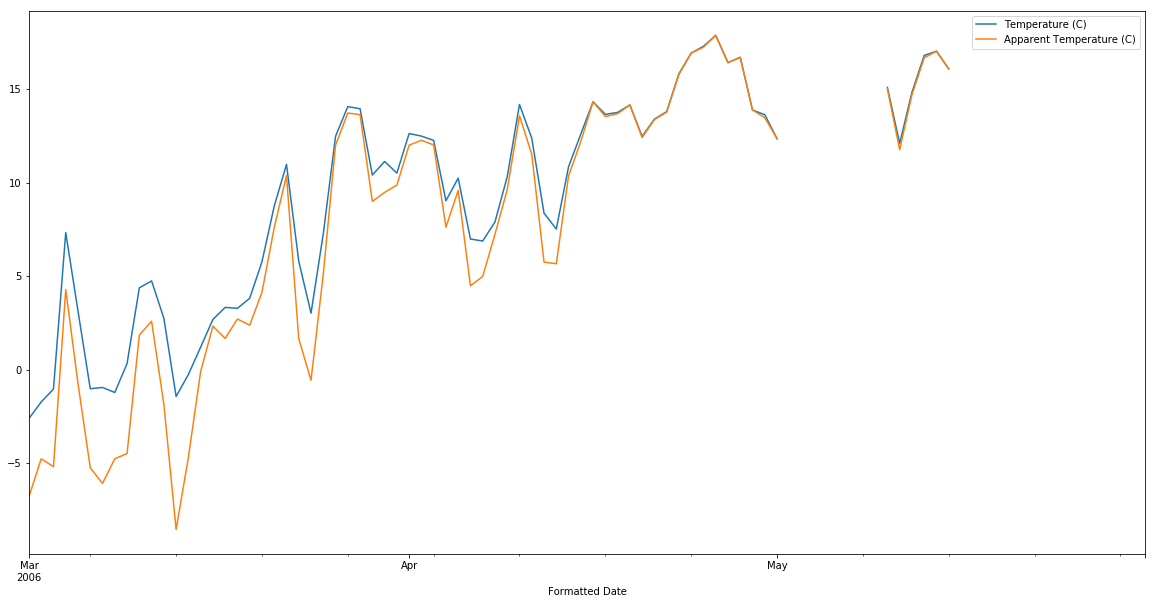

In [24]:
spring.plot(y= ['Temperature (C)','Apparent Temperature (C)'],figsize=(20,10))

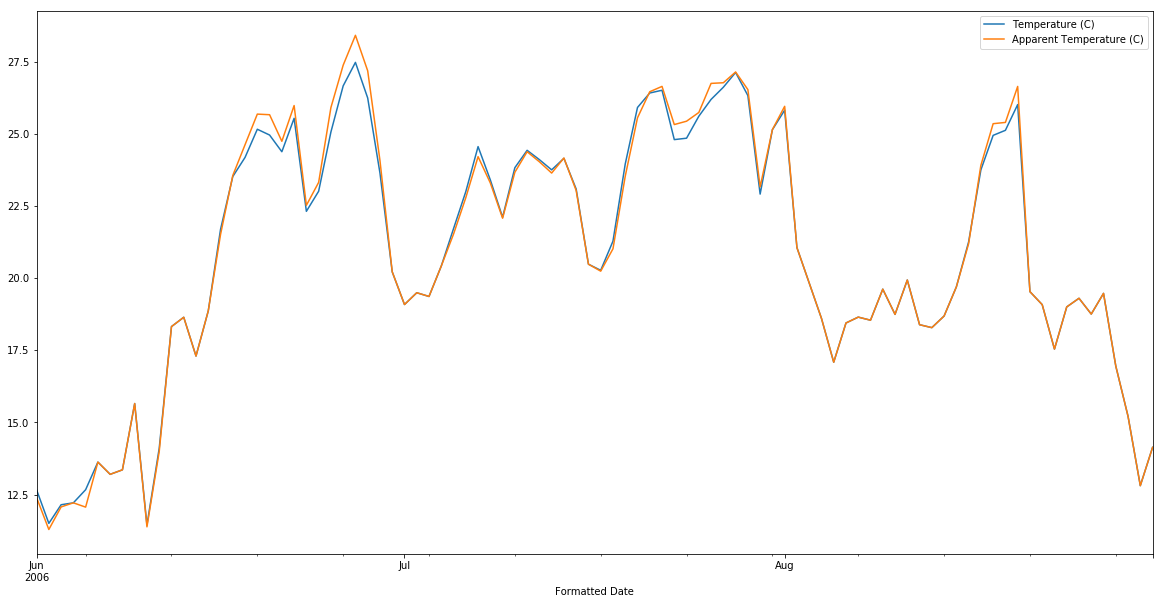

In [25]:
summer.plot(y= ['Temperature (C)','Apparent Temperature (C)'],figsize=(20,10))

## <h1><a id="31" style="color: teal">Correlation in data</a></h1>

In [26]:
#checking correlation between the cols
data.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Temperature (C),1.000000,0.992881,-0.564260,-0.053935,-0.080315
Apparent Temperature (C),0.992881,1.000000,-0.535399,-0.126701,-0.077491
Humidity,-0.564260,-0.535399,1.000000,-0.209529,0.061836
Wind Speed (km/h),-0.053935,-0.126701,-0.209529,1.000000,-0.043172
Pressure (millibars),-0.080315,-0.077491,0.061836,-0.043172,1.000000


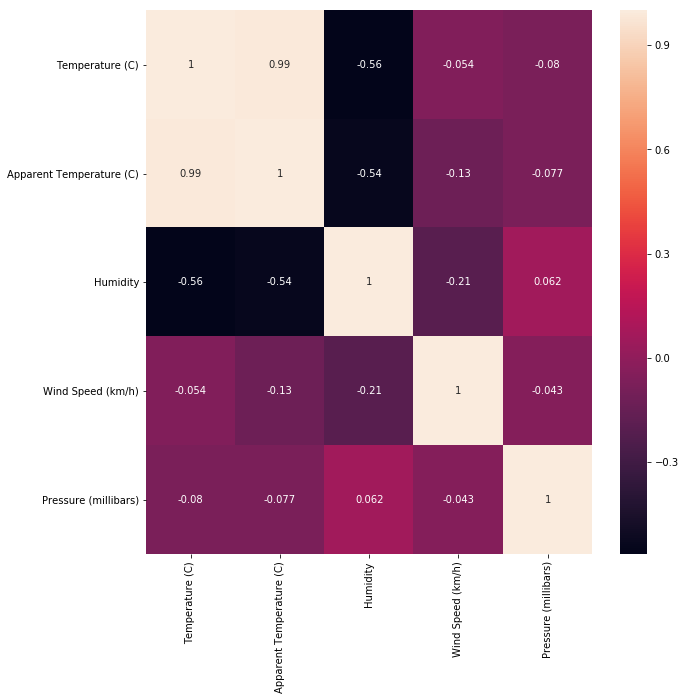

In [27]:
#plotting the correlation
plt.figure(figsize  =(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

## <h1><a id="32" style="color:teal">Data Visualization</a></h1>

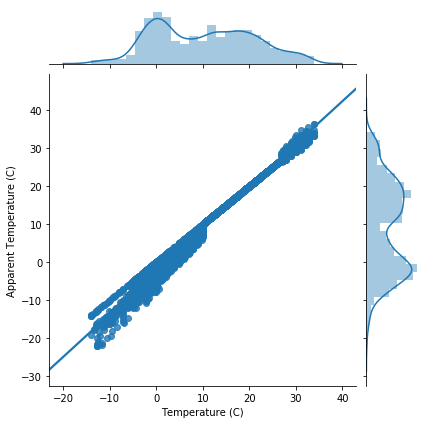

In [28]:
sns.jointplot('Temperature (C)', 'Apparent Temperature (C)',kind="reg", data=data)

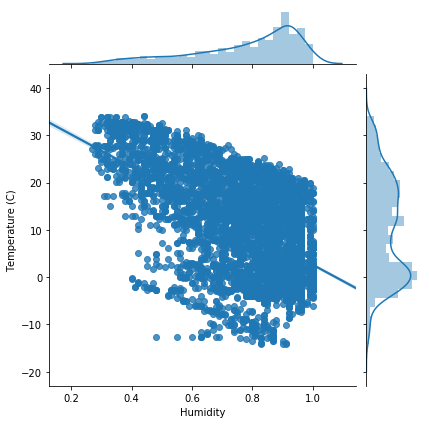

In [29]:
sns.jointplot('Humidity', 'Temperature (C)',kind="reg", data=data)

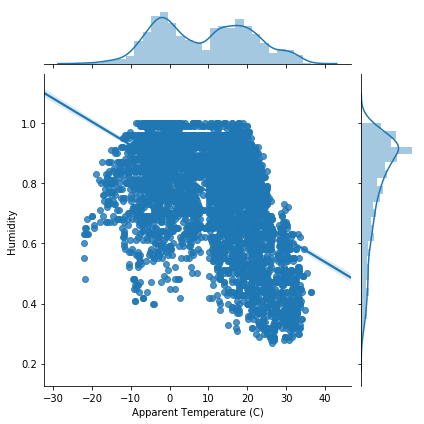

In [30]:
sns.jointplot('Apparent Temperature (C)','Humidity',kind="reg", data=data)

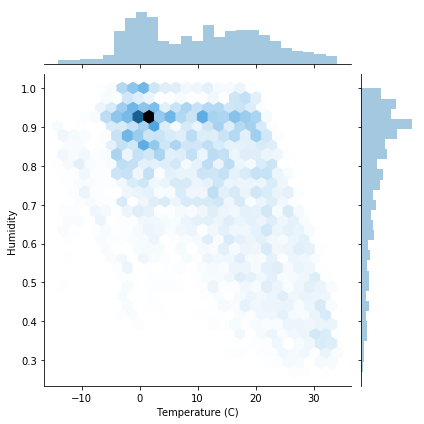

In [31]:
sns.jointplot(kind='hex',y=data['Humidity'],x=data['Temperature (C)'])

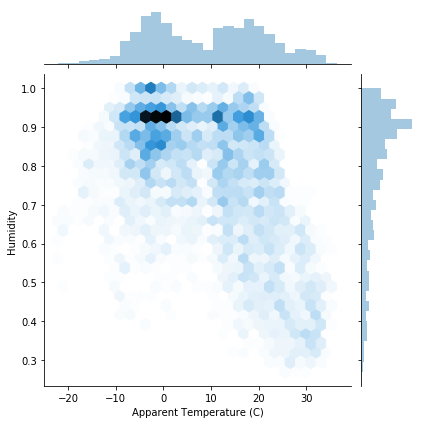

In [32]:
sns.jointplot(kind='hex',y=data['Humidity'],x=data['Apparent Temperature (C)'])

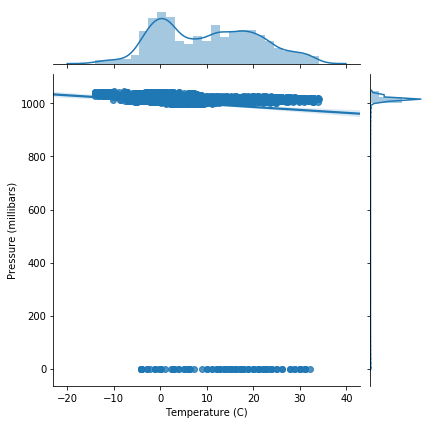

In [33]:
sns.jointplot('Temperature (C)', 'Pressure (millibars)',kind="reg", data=data)

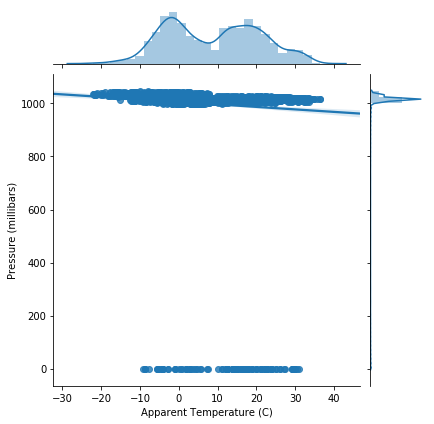

In [34]:
sns.jointplot('Apparent Temperature (C)','Pressure (millibars)',kind="reg", data=data)

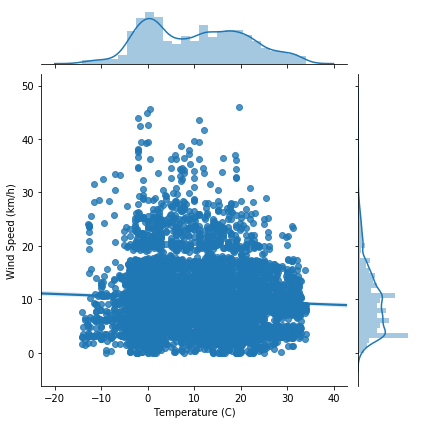

In [35]:
sns.jointplot('Temperature (C)', 'Wind Speed (km/h)',kind="reg", data=data )

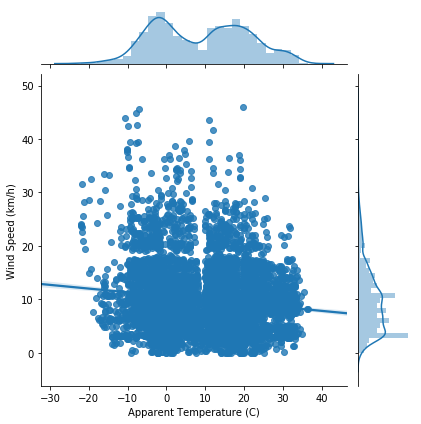

In [36]:
sns.jointplot('Apparent Temperature (C)','Wind Speed (km/h)',kind="reg", data=data)

<Figure size 1440x1440 with 0 Axes>

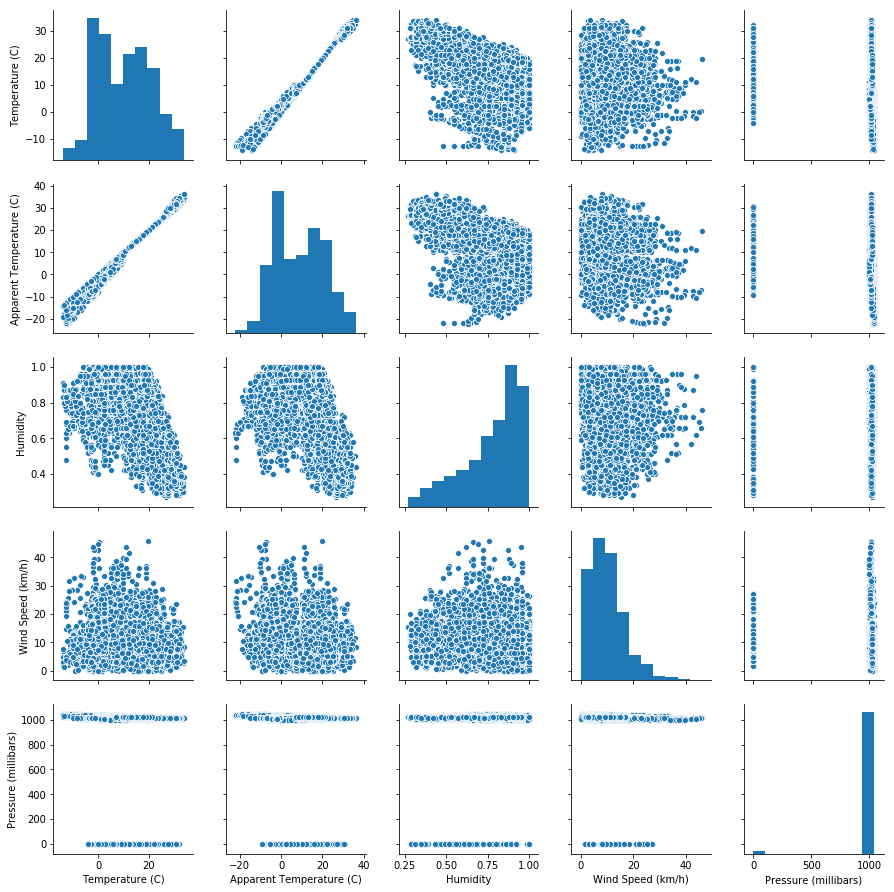

In [37]:
plt.figure(figsize  =(20,20))
sns.pairplot(data)
plt.show()

# <h1><a id="4" style="color:teal">IV. PREDICTING APPERANT TEMPERATURE</a></h1>

## <Li style="list-style-type: square"><span style="color: teal">Statement:</span></Li>
<li>Build a linear regression model taking the selected features through feature engineering</li>
<li>Predict the apparent temp for the split test data(Use 30% of the data for test)</li>

## <span style="color:teal">We are splitting the data into two parts i.e. 70% of the data is gonna be in the training model and the 30% of the data is going to be in the testing model and will predict the Apparent Temperature.</span>

In [38]:
idata=pd.get_dummies(idata)

In [39]:
x=idata[['Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']]
y=idata['Apparent Temperature (C)']

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [41]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
#predicting the Apparent Temperature
pred = lr.predict(x_test)

In [43]:
lr.score(x_test,y_test)

0.9914134199309375

## Calculating the error in prediction 

In [44]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test,pred)))

Mean Absolute Error:  0.874611495349508
Mean Squared Error:  1.2681461175904163
Root Mean Squared Error:  1.1261199392562127


# <h1><a id="5" style="color:teal">V. SUMMARY</a></h1>

## In this project i have done the following:
### 1. Performed data cleaning using pandas library. Which includes replacing the miscoded information and handling missing data.
### 2. Made a Exploratory Data Analysis on the data using pandas.
### 3. Visualized distributions and correlation of features using seaborn and pandas.
### 4. Built a linear regression model taking the selected features through feature engineering.
### 5. Predicted the apparent temp for the split test data(Use 30% of the data for test) 